## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making. 

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [101]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [75]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_df = crosstab.reset_index()
crosstab_df['ratio_bs'] = crosstab_df[True]/(crosstab_df[False] + crosstab_df[True])
crosstab_df.sort_values(by='ratio_bs', ascending=False)

# there are more best sellers in the category "Grocery"

isBestSeller,category,False,True,ratio_bs
109,Grocery,9008,556,0.058135
254,Smart Home Security & Lighting,98,6,0.057692
126,Health & Personal Care,9017,552,0.057686
185,Mobile Phone Accessories,248,11,0.042471
229,Power & Hand Tools,8353,306,0.035339
...,...,...,...,...
23,Bedding Collections,6309,0,0.000000
39,CPUs,249,0,0.000000
38,"CD, Disc & Tape Players",8798,0,0.000000
30,Blank Media Cases & Wallets,243,0,0.000000


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [76]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)


print(chi2_p_value < 0.05)

print(chi2_p_value)

# given the extremely low p-value we can conclude that the two variables are not independent. 
# Best seleer depends on the category. 

True
0.0


3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

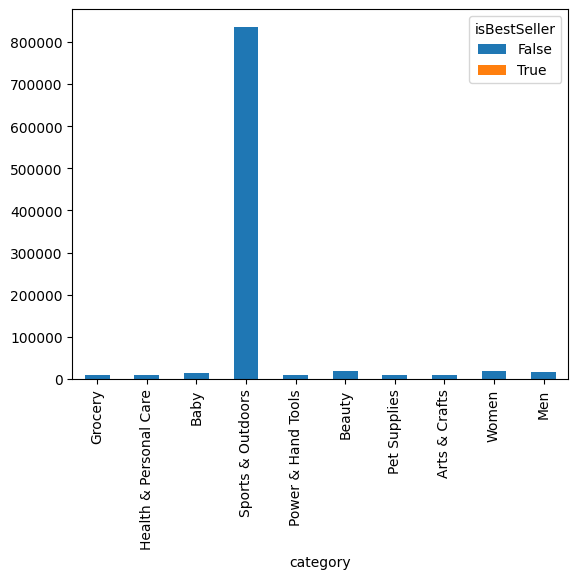

In [100]:
# let's plot the 10 top categories with the most best sellers. 
crosstab.sort_values(by=True, ascending=False).iloc[0:10,:].plot(kind="bar", stacked=True)


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

<Axes: ylabel='price'>

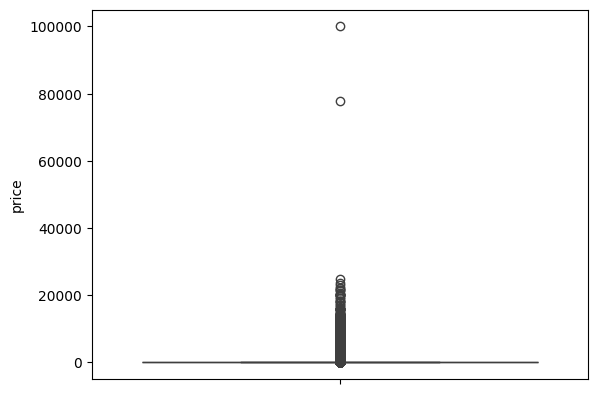

In [102]:
# Plotting a box plot to visualize the spread and outliers of 'price' for all products
sns.boxplot(data=df, y='price')

# the spread is huge. 


In [105]:
def filter_tukeys_test_outliers(data, metric):
    Q1 = data[metric].quantile(0.25)
    Q3 = data[metric].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers    
    return data[(data[metric] > lower_bound) & (data[metric] < upper_bound)]

In [106]:
clean_df = filter_tukeys_test_outliers(df, 'price')

In [112]:
top_categories = clean_df.groupby('category').count()['uid'].sort_values(ascending=False).iloc[0:20].index
top_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [113]:
clean_df[clean_df['category'].isin(top_categories)]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

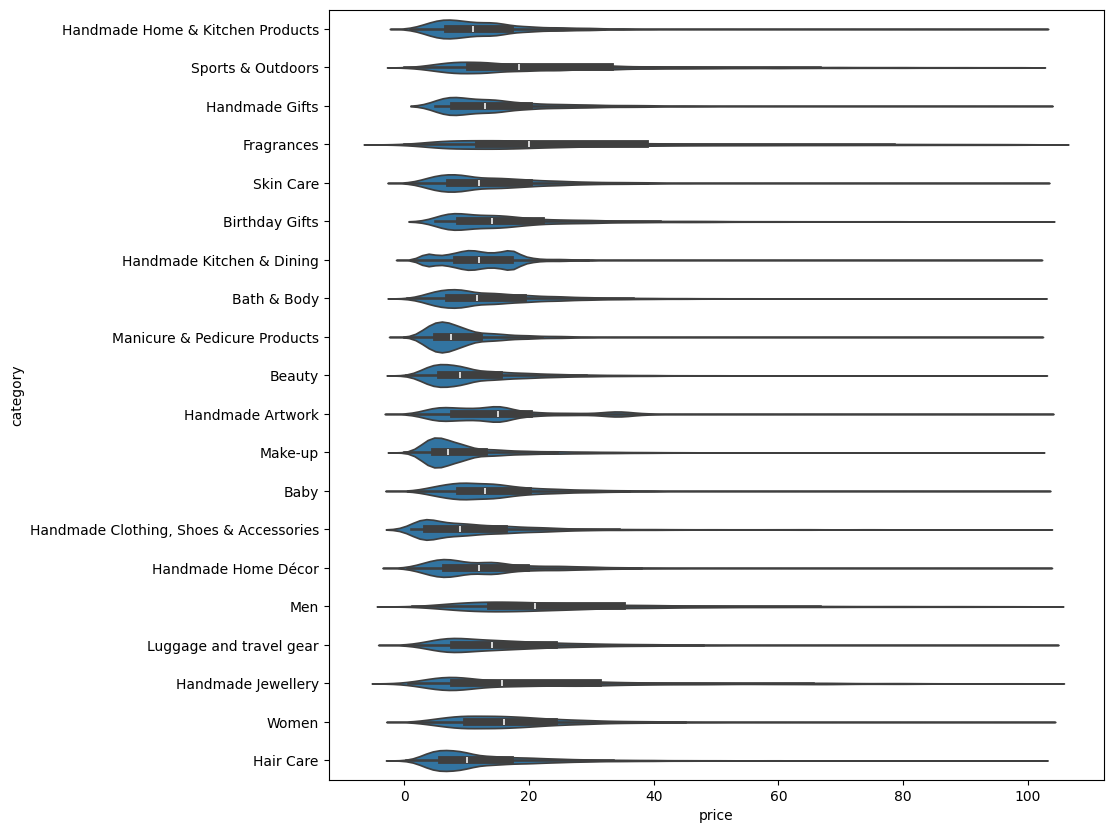

In [118]:
plt.figure(figsize=(10,10))

sns.violinplot(data=clean_df[clean_df['category'].isin(top_categories)], x='price', y='category')
# rotate axis labels

plt.show()


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [126]:
avg_price = clean_df[clean_df['category'].isin(top_categories[:10])][['category','price']].groupby('category').mean().reset_index()

<Axes: xlabel='price', ylabel='category'>

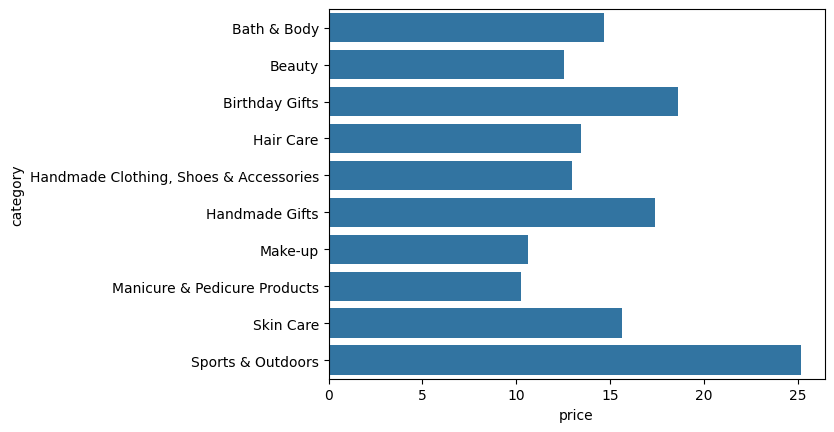

In [127]:
sns.barplot(data=avg_price, x='price', y='category')

<Axes: xlabel='price', ylabel='category'>

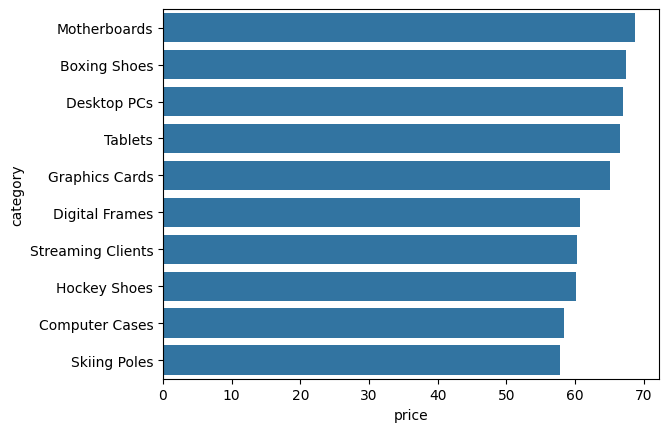

In [133]:
clean_df[['category','price']].groupby('category').mean().reset_index().sort_values(by='price', ascending=False)

# Motherboards has the highest average price.
sns.barplot(data=clean_df[['category','price']].groupby('category').mean().reset_index().sort_values(by='price', ascending=False).head(10), x='price', y='category')

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

<Axes: xlabel='stars', ylabel='category'>

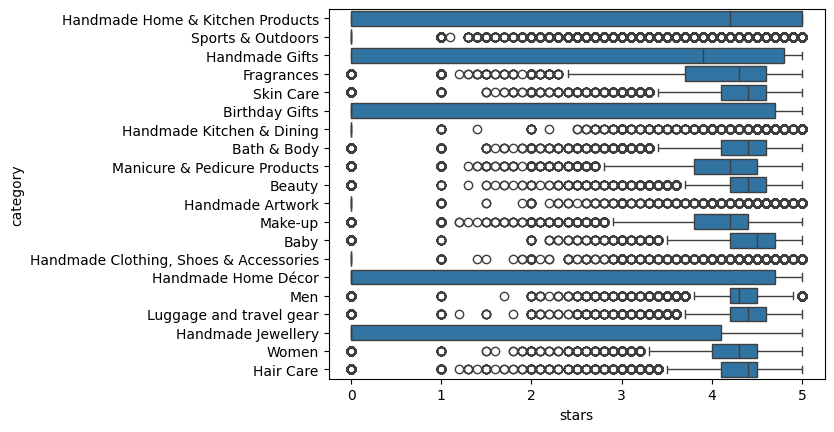

In [147]:
sns.boxplot(data=clean_df[clean_df['category'].isin(top_categories)], x='stars', y='category')

In [149]:
clean_df[['category','stars']].groupby('category').median().reset_index().sort_values(by='stars', ascending=False)
# Computer Memory has the highest median rating.

,category,stars
56,Computer Memory,4.7
25,"Beer, Wine & Spirits",4.6
36,Building & Construction Toys,4.6
209,Office Paper Products,4.6
157,Kids' Play Figures,4.6
...,...,...
271,"Synthesisers, Samplers & Digital Instruments",0.0
274,Tablets,0.0
3,Action Cameras,0.0
1,3D Printing & Scanning,0.0


<Axes: xlabel='stars', ylabel='category'>

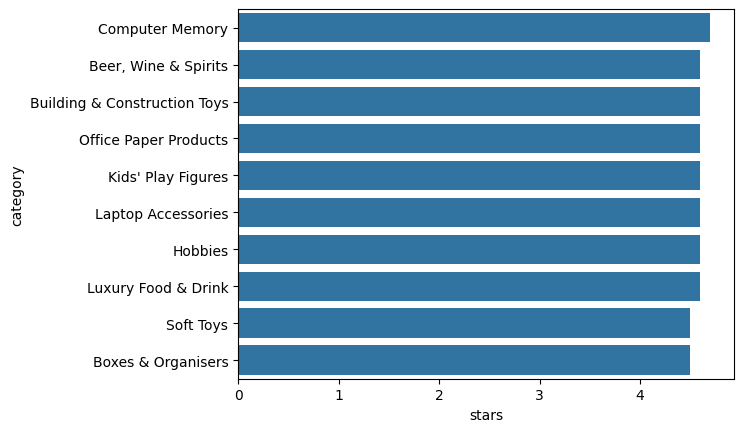

In [152]:
sns.barplot(data=clean_df[['category','stars']].groupby('category').median().reset_index().sort_values(by='stars', ascending=False).head(10), x='stars', y='category')

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [154]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = clean_df['price'].corr(clean_df['stars'])
correlation

# there seems to be a negative correlation. 

np.float64(-0.07767299878181438)

In [155]:
# let's group by category. 
clean_grouped_df = df.groupby('category')[['price','stars']].mean().reset_index()
correlation = clean_grouped_df['price'].corr(clean_grouped_df['stars'])
correlation

# there seems to be a negative correlation.

np.float64(-0.29922327360357026)

In [156]:
# Calculating the Spearman rank correlation between 'price' and 'stars' 
correlation = clean_df['price'].corr(clean_df['stars'], method='spearman')
correlation

# still negative. 

np.float64(-0.06679697280768307)

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

<Axes: xlabel='price', ylabel='stars'>

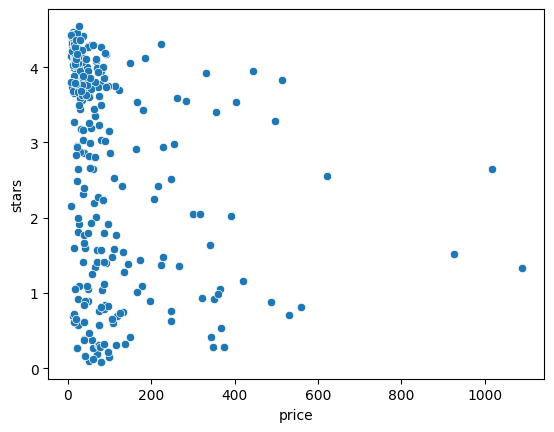

In [158]:
sns.scatterplot(data=clean_grouped_df, x='price', y='stars')

# there is no obvious correlation between the variables. 

In [161]:
corr_matrix = clean_df[['stars','reviews', 'price', 'isBestSeller', 'boughtInLastMonth' ]].corr()

<Axes: >

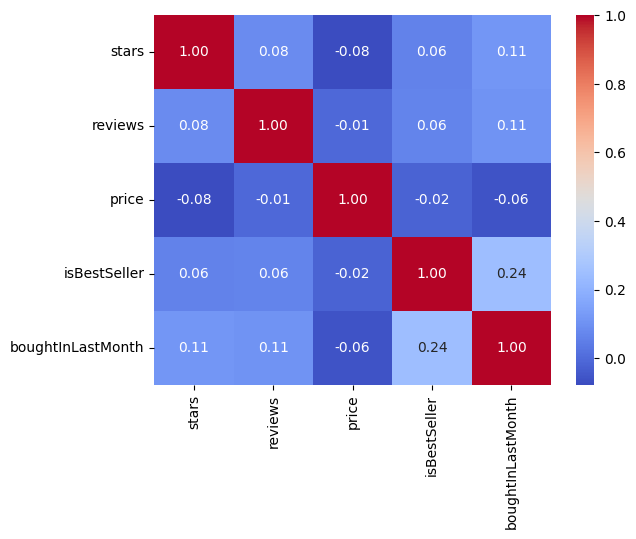

In [162]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# there are no obvious correlations between the numerical variables.